In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r'C:\Disk_D\Comp_&_Viz\Project\sales_06_FY2020-21\sales_06_FY2020-21.csv')
data.head()

C:\Users\18572\AppData\Local\Temp\ipykernel_6032\186456180.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Disk_D\Comp_&_Viz\Project\sales_06_FY2020-21\sales_06_FY2020-21.csv')


,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0


In [4]:
#check the shape of the dataframe
data.shape

(286392, 36)

In [5]:
#check the null values in the dataframe
data.isna().sum()

order_id            0
order_date          0
status              0
item_id             0
sku                 0
qty_ordered         0
price               0
value               0
discount_amount     0
total               0
category            0
payment_method      0
bi_st               0
cust_id             0
year                0
month               0
ref_num             0
Name Prefix         0
First Name          0
Middle Initial      0
Last Name           0
Gender              0
age                 0
full_name           0
E Mail              0
Customer Since      0
SSN                 0
Phone No.           0
Place Name          0
County              0
City                0
State               0
Zip                 0
Region              0
User Name           0
Discount_Percent    0
dtype: int64

In [6]:
#check if we have duplicate rows
data.duplicated().sum()

0

In [7]:
#check the distribution of the status
data['status'].value_counts()

canceled          112166
complete           88968
received           51775
order_refunded     25713
refund              3820
cod                 2851
paid                 756
closed               176
payment_review        57
pending               48
processing            33
holded                25
pending_paypal         4
Name: status, dtype: int64

In [8]:
data.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Customer Since', 'SSN', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [9]:
data.rename(columns={'Name Prefix':'name_prefix','First Name':'first_name','Middle Initial':'middle_name','Last Name':'last_name',
            'Gender':'gender','E Mail':'email','Customer Since':'customer_since','SSN':'ssn','Phone No. ':'phone_no','Place Name':'place_name',
            'Country':'country','City':'city','State':'state','Zip':'zip','Region':'region','User Name':'user_name','Discount_Percent':'discount_percent'},inplace=True)
data.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'name_prefix', 'first_name', 'middle_name', 'last_name', 'gender',
       'age', 'full_name', 'email', 'customer_since', 'ssn', 'phone_no',
       'place_name', 'County', 'city', 'state', 'zip', 'region', 'user_name',
       'discount_percent'],
      dtype='object')

In [10]:
#count the nunique values and sort in ascending order
data.groupby('payment_method')['order_id'].nunique().sort_values(ascending=False)

payment_method
cod                  61086
Easypay              50955
easypay_voucher      26436
Payaxis              23880
bankalfalah          16906
Easypay_MA            8475
jazzvoucher           5177
jazzwallet            5029
customercredit        2318
apg                   1239
mcblite                208
cashatdoorstep           6
financesettlement        1
Name: order_id, dtype: int64

In [11]:
# Check the most popular items
print(data.groupby("item_id")["qty_ordered"].sum().sort_values(ascending=False))

item_id
859845.0    501.0
856247.0    501.0
859851.0    501.0
859848.0    501.0
845510.0    501.0
            ...  
854005.0      1.0
776765.0      1.0
658430.0      1.0
643933.0      1.0
835086.0      1.0
Name: qty_ordered, Length: 286392, dtype: float64


In [12]:
(data.isna().mean()*100).sort_values(ascending=False)

order_id            0.0
order_date          0.0
last_name           0.0
gender              0.0
age                 0.0
full_name           0.0
email               0.0
customer_since      0.0
ssn                 0.0
phone_no            0.0
place_name          0.0
County              0.0
city                0.0
state               0.0
zip                 0.0
region              0.0
user_name           0.0
middle_name         0.0
first_name          0.0
name_prefix         0.0
discount_amount     0.0
status              0.0
item_id             0.0
sku                 0.0
qty_ordered         0.0
price               0.0
value               0.0
total               0.0
ref_num             0.0
category            0.0
payment_method      0.0
bi_st               0.0
cust_id             0.0
year                0.0
month               0.0
discount_percent    0.0
dtype: float64

In [13]:
data.dtypes

order_id             object
order_date           object
status               object
item_id             float64
sku                  object
qty_ordered         float64
price               float64
value               float64
discount_amount     float64
total               float64
category             object
payment_method       object
bi_st                object
cust_id             float64
year                  int64
month                object
ref_num               int64
name_prefix          object
first_name           object
middle_name          object
last_name            object
gender               object
age                 float64
full_name            object
email                object
customer_since       object
ssn                  object
phone_no             object
place_name           object
County               object
city                 object
state                object
zip                   int64
region               object
user_name            object
discount_percent    

In [14]:
data.drop(["bi_st", "middle_name", "gender", "name_prefix", "email", "ssn", "phone_no", "County", "region", "discount_percent"], axis=1, inplace=True)

In [15]:
data['total']

0         1798.0
1          190.0
2         1199.2
3          639.2
4           99.9
           ...  
286387    4419.9
286388      39.9
286389      40.0
286390      49.9
286391    3559.9
Name: total, Length: 286392, dtype: float64

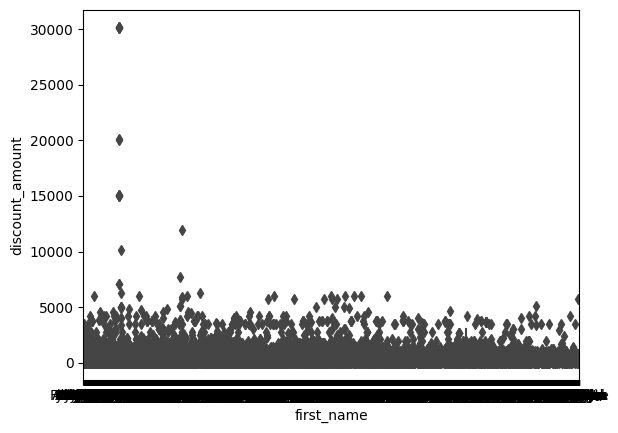

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
# create a boxplot using Seaborn
sns.boxplot(x=data['first_name'], y=data['discount_amount'], data=data)

# display the plot
plt.show()

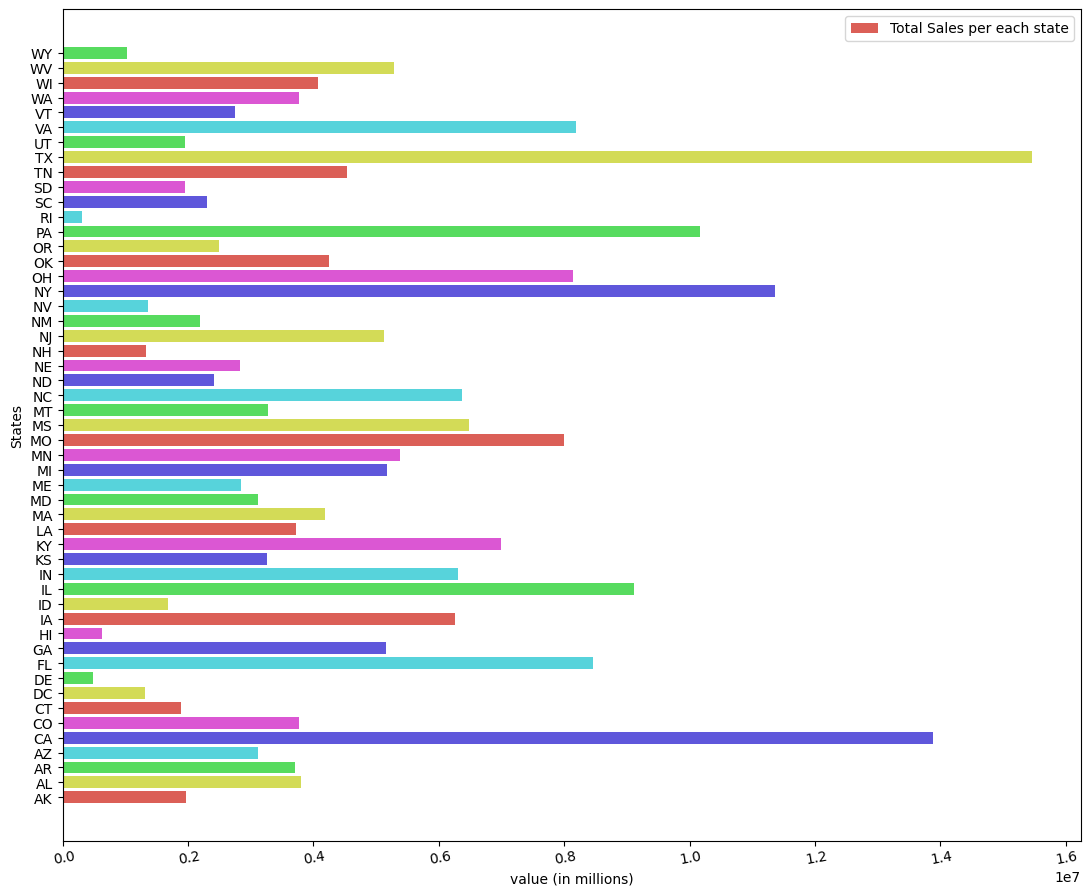

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
temp = data.groupby('state')['total'].sum()
df_state = temp.reset_index()

fig, ax = plt.subplots(figsize=(12,10))
fig.tight_layout(pad=5)

#changing the colors
colors = ['#db5f57', '#d3db57', '#57db5f', '#57d3db', '#5f57db', '#db57d3']
ax.barh(df_state['state'], df_state['total'], label='Total Sales per each state', color = colors)
ax.set_ylabel('States')
ax.set_xlabel('value (in millions)')
ax.legend()
plt.xticks(rotation = 10, wrap =True)
plt.show()


In [18]:
temp = data.groupby('month')['total'].sum()
df_state_month = temp.reset_index()
df_state_month['month'] = pd.to_datetime(df_state_month['month'])
df_sort = df_state_month.sort_values(by=['month'])
df_sort

,month,total
10,2020-10-01,5.299812e+06
9,2020-11-01,1.148501e+07
2,2020-12-01,5.766699e+07
4,2021-01-01,7.141194e+06
3,2021-02-01,4.404198e+06
7,2021-03-01,2.516152e+07
0,2021-04-01,3.669856e+07
8,2021-05-01,1.005662e+07
6,2021-06-01,2.464510e+07
5,2021-07-01,1.903746e+07


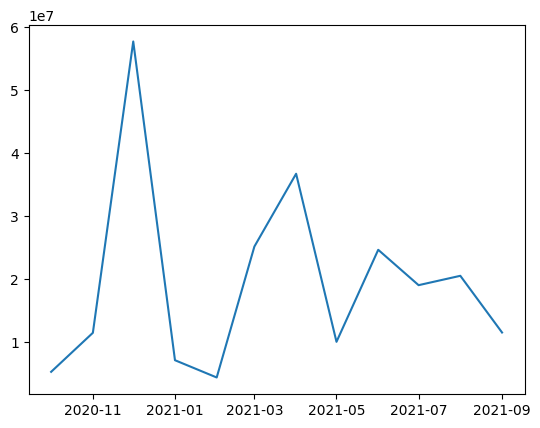

In [19]:
plt.plot(df_sort['month'],df_sort['total'])
plt.show()

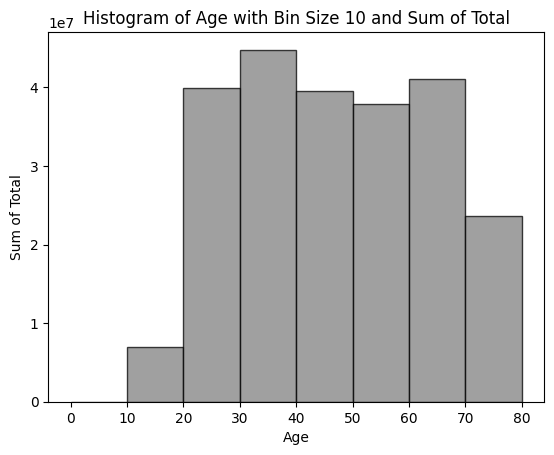

In [20]:
import matplotlib.pyplot as plt

# Sample data for ages and totals
ages = [18, 22, 25, 30, 35, 40, 42, 45, 50, 55, 60, 65, 70, 75, 80]
totals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 90, 80, 70, 60, 50]

# Define bin size and bins
bin_size = 10
bins = range(0, max(ages) + bin_size, bin_size)

# Create histogram
plt.hist(data['age'], bins=bins, weights=data['total'], color='grey', edgecolor='black', alpha=0.75)


# Set x and y axis labels
plt.xlabel('Age')
plt.ylabel('Sum of Total')

# Set title of histogram
plt.title('Histogram of Age with Bin Size 10 and Sum of Total')

# Show histogram
plt.show()


C:\Users\18572\AppData\Local\Temp\ipykernel_6032\758720909.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin=-1, vmax=1, center= 0, cmap=cmap,annot = True)


<AxesSubplot: >

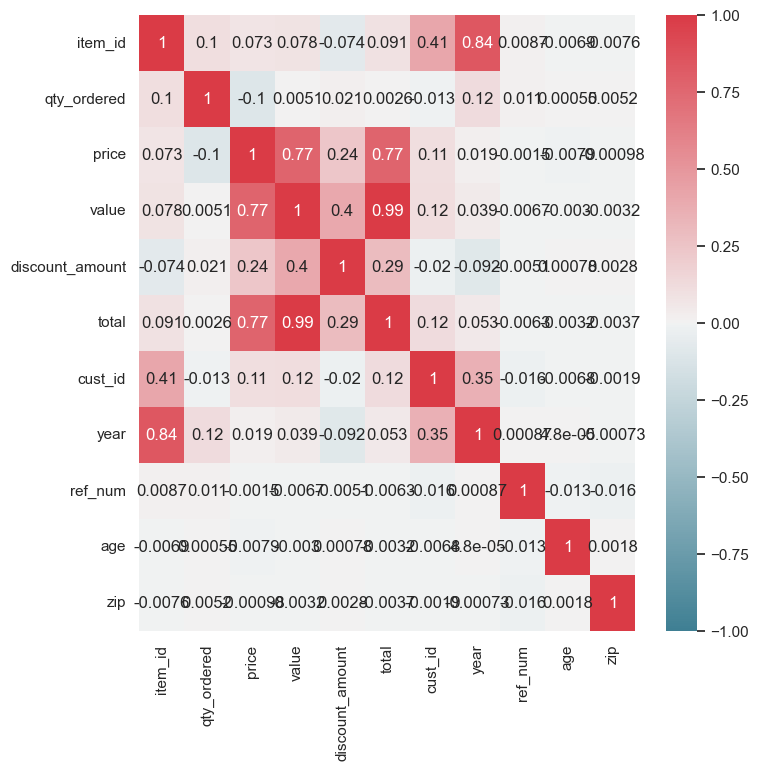

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style='white')
plt.figure(figsize=(8, 8))
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(data.corr(), vmin=-1, vmax=1, center= 0, cmap=cmap,annot = True)